In [ ]:
#install modules which are not included into Google Colab
!pip install tf_explain
!pip3 install pickle5

     |████████████████████████████████| 51kB 4.6MB/s 


import modules and test plots

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tf_explain.core.smoothgrad import SmoothGrad
import matplotlib.pyplot as plt
from tf_explain.core.grad_cam import GradCAM #Doesnt work anymore
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity #needs patch size
from tf_explain.core.integrated_gradients import IntegratedGradients
plots_test = np.load("/content/drive/MyDrive/clean_Helcaraxe/Helcaraxe_elenwe_Iobs_test_plots.npy")

load test labels

In [ ]:
import pickle5 as pickle
with open("/content/drive/MyDrive/clean_Helcaraxe/helcaraxe_elenwe_Iobs_test_labels.pkl", "rb") as fh:
  bin_label = pickle.load(fh)
bin_label = np.asarray(bin_label["Ice-Ring"])

Remove plots and labels which were marked as havin cut out intensities

In [ ]:
#clean deleted plots
fin_plots_test, labels = [],[]
print(len(bin_label),len(plots_test))
for i, lab in enumerate(bin_label):
  if lab == "99":
    pass
  else:
    fin_plots_test.append(plots_test[i])
    labels.append(bin_label[i])

print(len(labels),len(fin_plots_test))
label = tf.keras.utils.to_categorical(labels, num_classes=2)

1436 1436
1408 1408


Load model prepared by Smooth_Grad_model_prepper.ipynb

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/clean_Helcaraxe/class_model_elenwe_Iobs")

In [ ]:
#[1. 0.] = no ice
#[0. 1.] = ice

Call SmoothGrad on all plots and then average them

In [ ]:
n = "all_training"
def gridder(cindex, index):
    grid_lst = []
    for i,plot in enumerate(fin_plots_test):
      if label[i][1] > 0.5:
        data = ([plot], None)
        grid = SmoothGrad().explain(data, model, class_index=cindex)
        grid_lst.append(grid)
    return grid_lst

#average all plots
class_0 = np.average(gridder(0,n), axis=0)
class_1 = np.average(gridder(1,n), axis=0)

display and save the results

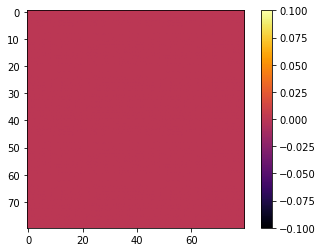

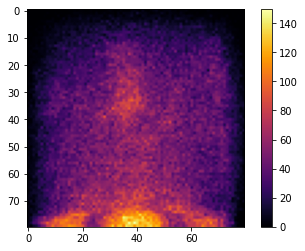

In [ ]:
plt.imshow(class_0, cmap="inferno")
plt.colorbar()
plt.savefig("/content/drive/MyDrive/clean_Helcaraxe/smooth_grad_images/Fobs_train_class_0.svg")
plt.show()

plt.imshow(class_1, cmap="inferno")
plt.colorbar()
plt.savefig("/content/drive/MyDrive/clean_Helcaraxe/smooth_grad_images/Fobs_train_class_1.svg")
plt.show()